<a href="https://colab.research.google.com/github/omwattiemotee/Python-FDP-23/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project - Percent Change in Consumer spending January-2020-Through the present.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as stats

In [ ]:
url = "https://raw.githubusercontent.com/omwattiemotee/Python-FDP-23/main/Consumer.spending.csv"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)


# Cleaning and Analyzing of Dataset.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].abs()

In [ ]:
df.head(5)

,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"
0,900,01/13/2020,0.617,4.35,11.9,4.240,2.1500,6.71,1.90,2.330,2.470
1,2500,01/13/2020,0.914,2.02,15.2,1.530,1.0000,7.28,1.48,0.981,0.898
2,3400,01/13/2020,0.887,2.50,10.0,2.430,0.5400,6.54,2.40,1.630,2.710
3,3600,01/13/2020,0.389,2.61,14.3,0.193,0.3310,9.15,2.36,0.378,1.040
4,4400,01/13/2020,2.570,3.05,25.4,0.715,0.0037,9.76,4.40,3.060,5.900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   State FIPS code                                                              4605 non-null   int64  
 1   Date                                                                         4605 non-null   object 
 2   All merchant category codes spending                                         4605 non-null   float64
 3   Accommodation and food service (ACF) spending                                4605 non-null   float64
 4   Arts, entertainment, and recreation (AER)  spending                          4605 non-null   float64
 5   General merchandise stores (GEN) and apparel and accessories (AAP) spending  4605 non-null   float64
 6   Grocery and food store (GRF)  spending  

In [ ]:
# Changing Dtype
df['Date'] = pd.to_datetime(df['Date'])
df['State FIPS code'] = df['State FIPS code'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   State FIPS code                                                              4605 non-null   object        
 1   Date                                                                         4605 non-null   datetime64[ns]
 2   All merchant category codes spending                                         4605 non-null   float64       
 3   Accommodation and food service (ACF) spending                                4605 non-null   float64       
 4   Arts, entertainment, and recreation (AER)  spending                          4605 non-null   float64       
 5   General merchandise stores (GEN) and apparel and accessories (AAP) spending  4605 non-null   floa

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
All merchant category codes spending,4605.0,12.179405,8.525584,0.0004,4.62,11.7,17.9,44.6
Accommodation and food service (ACF) spending,4605.0,20.285516,16.544594,0.0187,8.46,15.6,27.1,76.7
"Arts, entertainment, and recreation (AER) spending",4605.0,29.483609,20.389608,0.0556,11.90,27.5,44.1,86.0
General merchandise stores (GEN) and apparel and accessories (AAP) spending,4605.0,16.679748,10.968336,0.0010,7.37,16.0,24.3,61.3
Grocery and food store (GRF) spending,4605.0,16.786436,9.175663,0.0037,11.70,16.1,21.0,77.1
Health care and social assistance (HCS) spending,4605.0,16.910271,15.499413,0.0158,6.07,12.5,21.7,87.4
Transportation and warehousing (TWS) spending,4595.0,38.749506,25.060185,0.0026,15.30,37.2,61.9,92.3
"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)",4605.0,17.317753,8.140118,0.0483,12.00,17.5,22.9,49.6
"Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)",4605.0,19.727657,10.625155,0.0007,12.10,19.7,27.2,77.8


In [ ]:
# Check for missing value in any column
print('Total no of Null Values after treating Null values : ')
df.isnull().sum()

Total no of Null Values after treating Null values : 


State FIPS code                                                                 0
Date                                                                            0
All merchant category codes spending                                            0
Accommodation and food service (ACF) spending                                   0
Arts, entertainment, and recreation (AER)  spending                             0
General merchandise stores (GEN) and apparel and accessories (AAP) spending     0
Grocery and food store (GRF)  spending                                          0
Health care and social assistance (HCS) spending                                0
Transportation and warehousing (TWS)  spending                                 10
Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH)         0
Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)              0
dtype: int64

In [ ]:
# Check for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"


In [ ]:
# Check for null values in col.
print('Total number of null values for below columns: ')
print('  ')
df.isnull().sum()[df.isnull().sum()>0]

Total number of null values for below columns: 
  


Transportation and warehousing (TWS)  spending    10
dtype: int64

In [ ]:
# Checking for unique values in col.
print('unique value for column  :' ,df['State FIPS code'].unique())

unique value for column  : ['900' '2500' '3400' '3600' '4400']


# Mean, Median & Mode


In [ ]:
import pandas as pd
from scipy import stats

# Calculate mean, median, and mode for All merchant category codes spending
result = {}

for column in df.columns:
    # Calculate mean
    mean = df['All merchant category codes spending'].mean()

    # Calculate median
    median = df['All merchant category codes spending'].median()

    # Calculate mode
    mode = stats.mode(df['All merchant category codes spending'])[0][0]

    result['All merchant category codes spending'] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Print the result
for column, stats in result.items():
    print("All merchant category codes spending:")
    print("Mean:", stats['Mean'])
    print("Median:", stats['Median'])
    print("Mode:", stats['Mode'])
    print()


All merchant category codes spending:
Mean: 12.179404820846907
Median: 11.7
Mode: 12.4



<ipython-input-13-97927f7e8d2b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df['All merchant category codes spending'])[0][0]
<ipython-input-13-97927f7e8d2b>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df['All mercha

# Create a histogram for all continuous variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

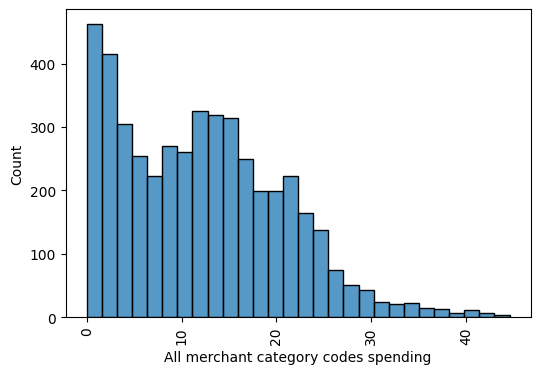

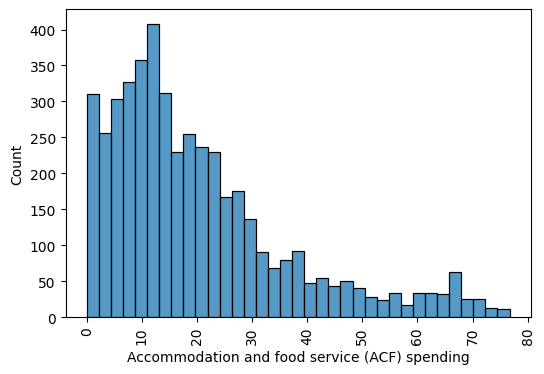

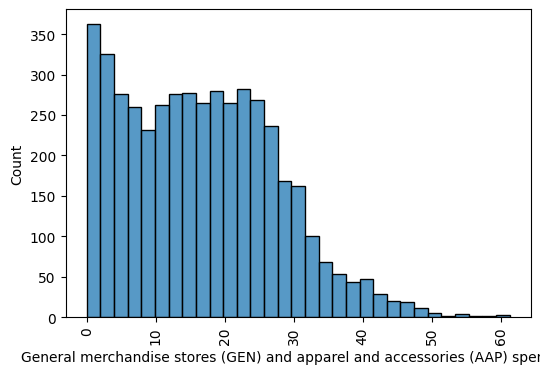

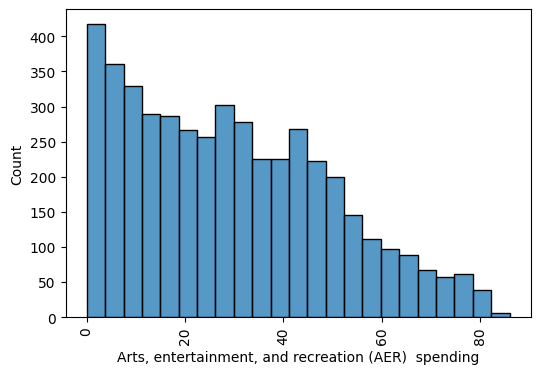

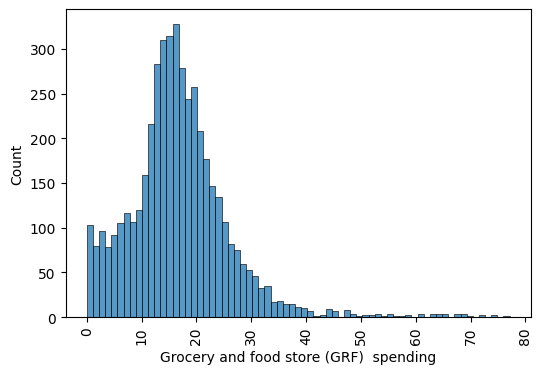

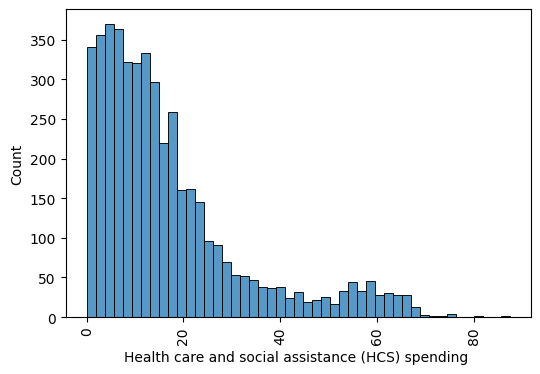

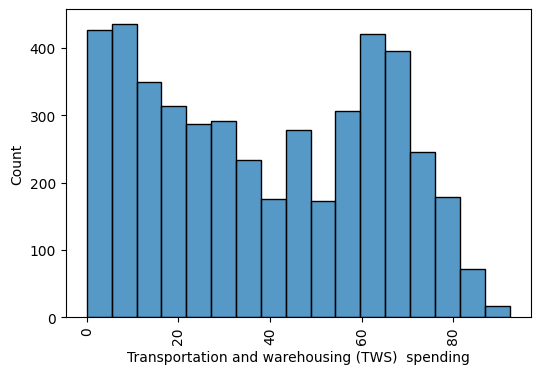

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='All merchant category codes spending')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Accommodation and food service (ACF) spending')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='General merchandise stores (GEN) and apparel and accessories (AAP) spending')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Arts, entertainment, and recreation (AER)  spending')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Grocery and food store (GRF)  spending')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Health care and social assistance (HCS) spending ')
plt.xticks(rotation=90);

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Transportation and warehousing (TWS)  spending')
plt.xticks(rotation=90);


# Showing outliers

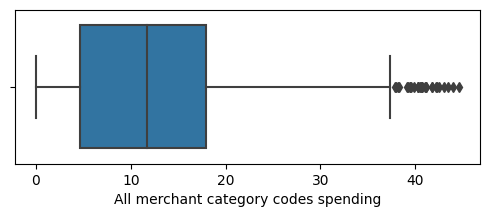

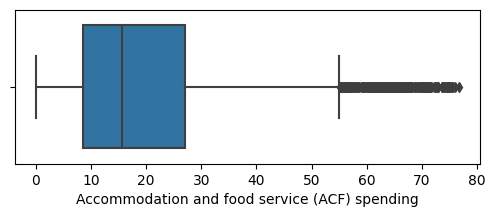

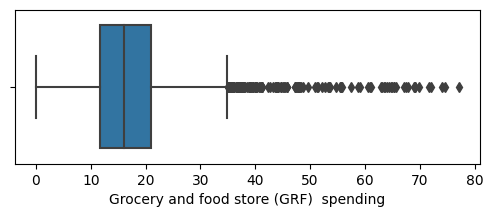

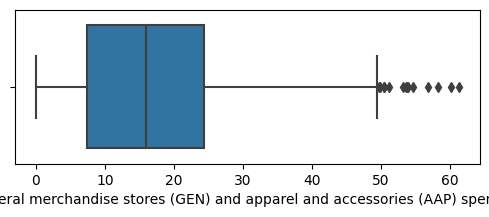

In [ ]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='All merchant category codes spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='Accommodation and food service (ACF) spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='Grocery and food store (GRF)  spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='General merchandise stores (GEN) and apparel and accessories (AAP) spending') ;

# Removing outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lrincome,urincome=remove_outlier(df['All merchant category codes spending'])
df['All merchant category codes spending']=np.where(df['All merchant category codes spending']>urincome,urincome,df['All merchant category codes spending'])
df['All merchant category codes spending']=np.where(df['All merchant category codes spending']<lrincome,lrincome,df['All merchant category codes spending'])

lrincome,urincome=remove_outlier(df['Accommodation and food service (ACF) spending'])
df['Accommodation and food service (ACF) spending']=np.where(df['Accommodation and food service (ACF) spending']>urincome,urincome,df['Accommodation and food service (ACF) spending'])
df['Accommodation and food service (ACF) spending']=np.where(df['Accommodation and food service (ACF) spending']<lrincome,lrincome,df['Accommodation and food service (ACF) spending'])


lrincome,urincome=remove_outlier(df['Grocery and food store (GRF)  spending'])
df['Grocery and food store (GRF)  spending']=np.where(df['Grocery and food store (GRF)  spending']>urincome,urincome,df['Grocery and food store (GRF)  spending'])
df['Grocery and food store (GRF)  spending']=np.where(df['Grocery and food store (GRF)  spending']<lrincome,lrincome,df['Grocery and food store (GRF)  spending'])

lrincome,urincome=remove_outlier(df['General merchandise stores (GEN) and apparel and accessories (AAP) spending'])
df['General merchandise stores (GEN) and apparel and accessories (AAP) spending']=np.where(df['General merchandise stores (GEN) and apparel and accessories (AAP) spending']>urincome,urincome,df['General merchandise stores (GEN) and apparel and accessories (AAP) spending'])
df['General merchandise stores (GEN) and apparel and accessories (AAP) spending']=np.where(df['General merchandise stores (GEN) and apparel and accessories (AAP) spending']<lrincome,lrincome,df['General merchandise stores (GEN) and apparel and accessories (AAP) spending'])

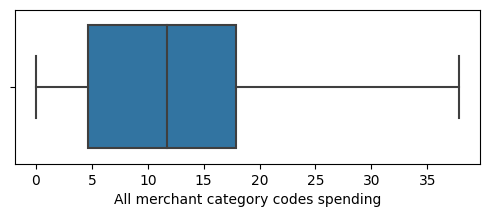

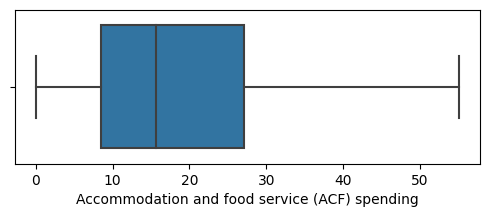

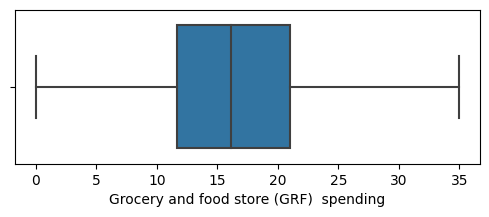

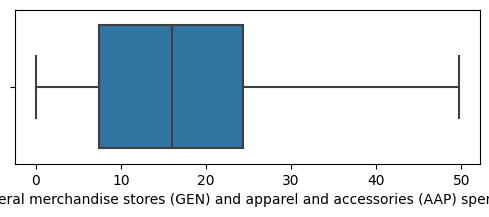

In [ ]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='All merchant category codes spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='Accommodation and food service (ACF) spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='Grocery and food store (GRF)  spending') ;

plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='General merchandise stores (GEN) and apparel and accessories (AAP) spending') ;

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

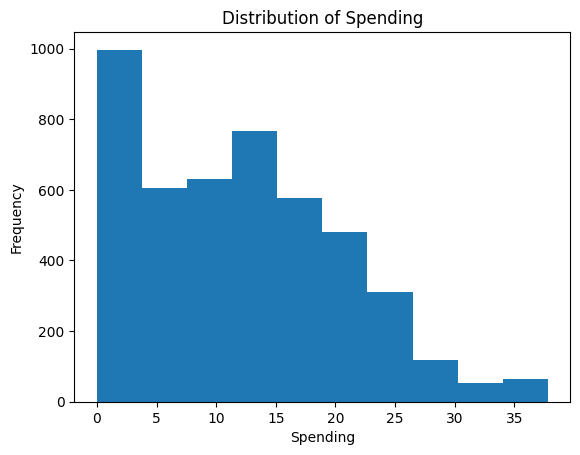

In [ ]:
plt.hist(df['All merchant category codes spending'], bins=10)
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Spending')
plt.show()

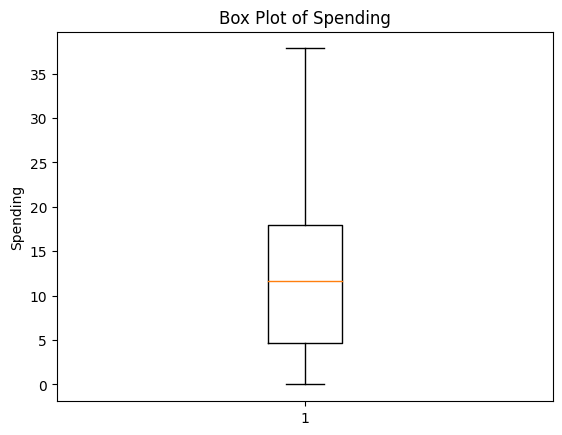

In [ ]:
plt.boxplot(df['All merchant category codes spending'])
plt.ylabel('Spending')
plt.title('Box Plot of Spending')
plt.show()

<ipython-input-23-e3a19e4ad080>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['All merchant category codes spending'], shade=True)


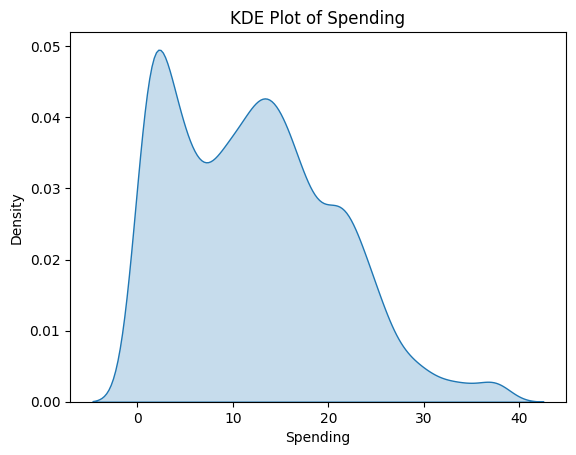

In [ ]:
sns.kdeplot(df['All merchant category codes spending'], shade=True)
plt.xlabel('Spending')
plt.ylabel('Density')
plt.title('KDE Plot of Spending')
plt.show()

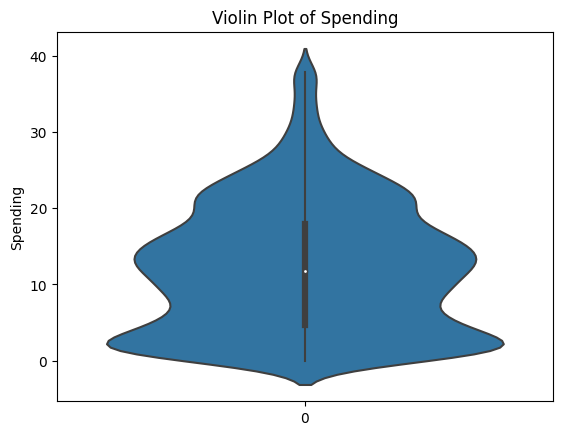

In [ ]:
sns.violinplot(df['All merchant category codes spending'])
plt.ylabel('Spending')
plt.title('Violin Plot of Spending')
plt.show()

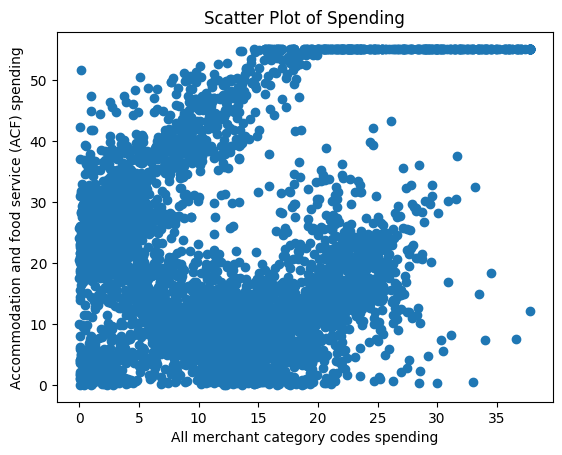

In [ ]:
plt.scatter(df['All merchant category codes spending'], df['Accommodation and food service (ACF) spending'])
plt.xlabel('All merchant category codes spending')
plt.ylabel('Accommodation and food service (ACF) spending')
plt.title('Scatter Plot of Spending')
plt.show()

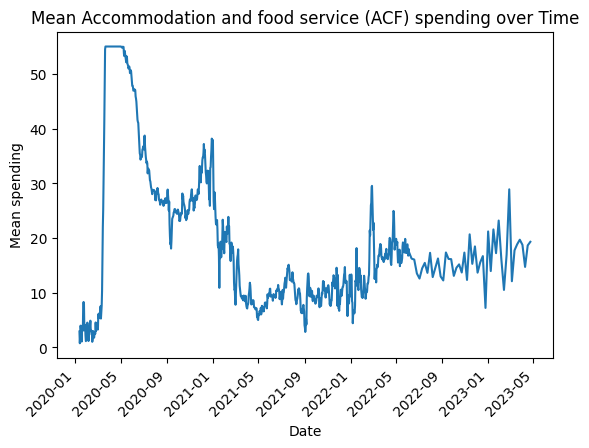

In [ ]:
df.groupby('Date')['Accommodation and food service (ACF) spending'].mean().plot()
plt.xlabel('Date')
plt.ylabel('Mean spending')
plt.title('Mean Accommodation and food service (ACF) spending over Time')
plt.xticks(rotation=45)
plt.show()

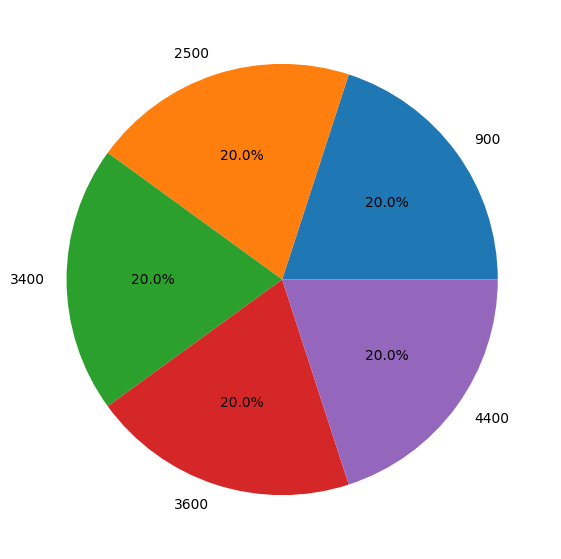

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df["State FIPS code"].value_counts(),labels=df["State FIPS code"].value_counts().index,autopct='%1.1f%%')
plt.show()

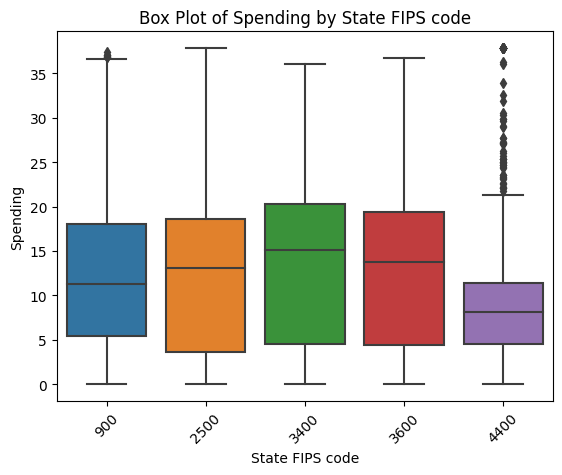

In [ ]:
sns.boxplot(x='State FIPS code', y='All merchant category codes spending', data=df)
plt.xlabel('State FIPS code')
plt.ylabel('Spending')
plt.title('Box Plot of Spending by State FIPS code')
plt.xticks(rotation=45)
plt.show()

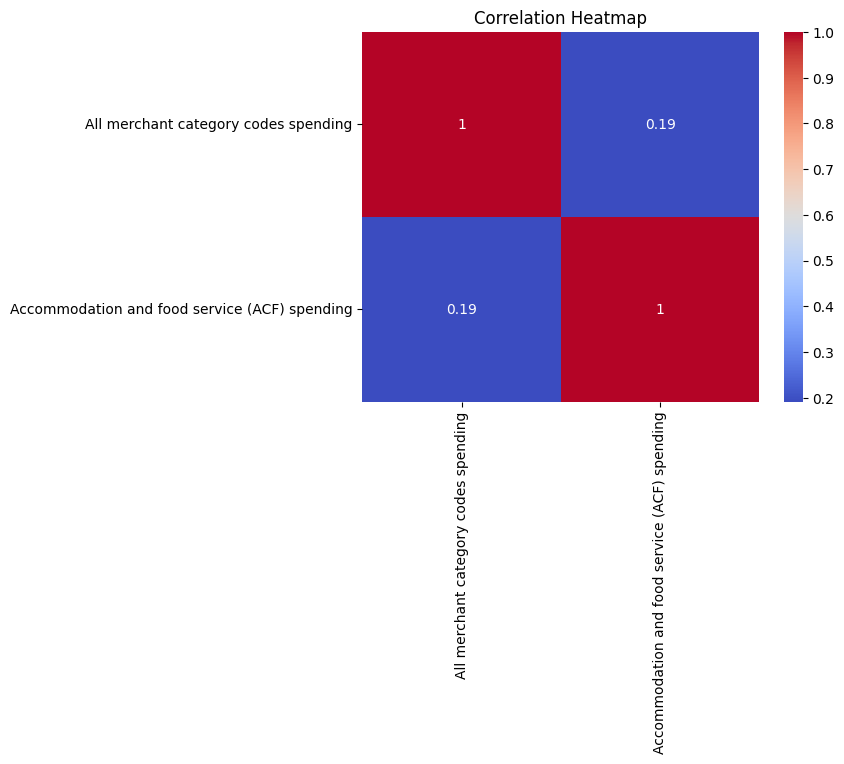

In [ ]:
corr_matrix = df[['All merchant category codes spending', 'Accommodation and food service (ACF) spending']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

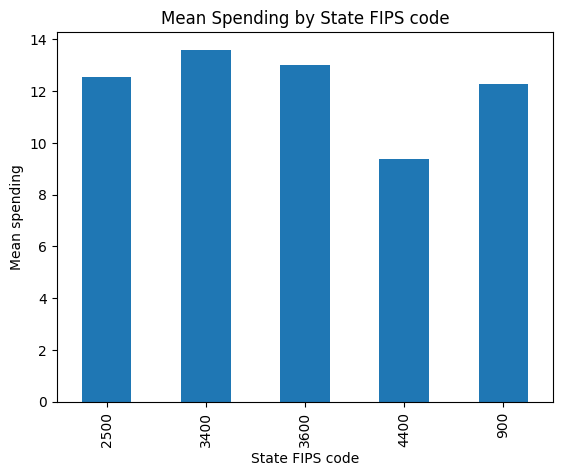

In [ ]:
df.groupby('State FIPS code')['All merchant category codes spending'].mean().plot(kind='bar')
plt.xlabel('State FIPS code')
plt.ylabel('Mean spending')
plt.title('Mean Spending by State FIPS code')
plt.show()

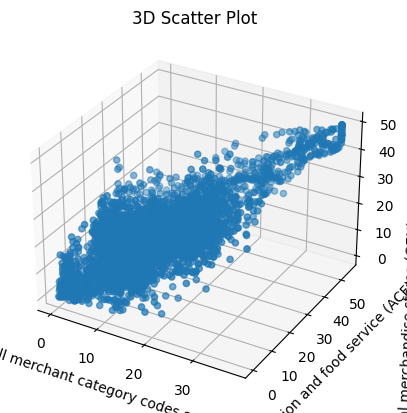

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['All merchant category codes spending'], df['Accommodation and food service (ACF) spending'], df['General merchandise stores (GEN) and apparel and accessories (AAP) spending'])
ax.set_xlabel('All merchant category codes spending')
ax.set_ylabel('Accommodation and food service (ACF) spending')
ax.set_zlabel('General merchandise stores (GEN) and apparel and accessories (AAP) spending')
plt.title('3D Scatter Plot')
plt.show()

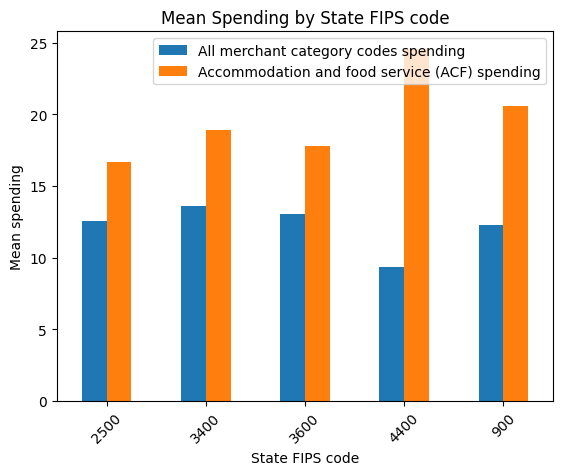

In [ ]:
df.groupby('State FIPS code')[['All merchant category codes spending', 'Accommodation and food service (ACF) spending']].mean().plot(kind='bar')
plt.xlabel('State FIPS code')
plt.ylabel('Mean spending')
plt.title('Mean Spending by State FIPS code')
plt.xticks(rotation=45)
plt.legend(['All merchant category codes spending', 'Accommodation and food service (ACF) spending'])
plt.show()

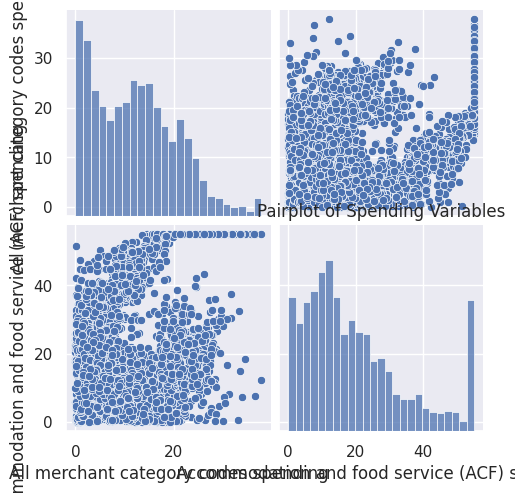

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.pairplot(df[['All merchant category codes spending', 'Accommodation and food service (ACF) spending']])
plt.title('Pairplot of Spending Variables')
plt.show()

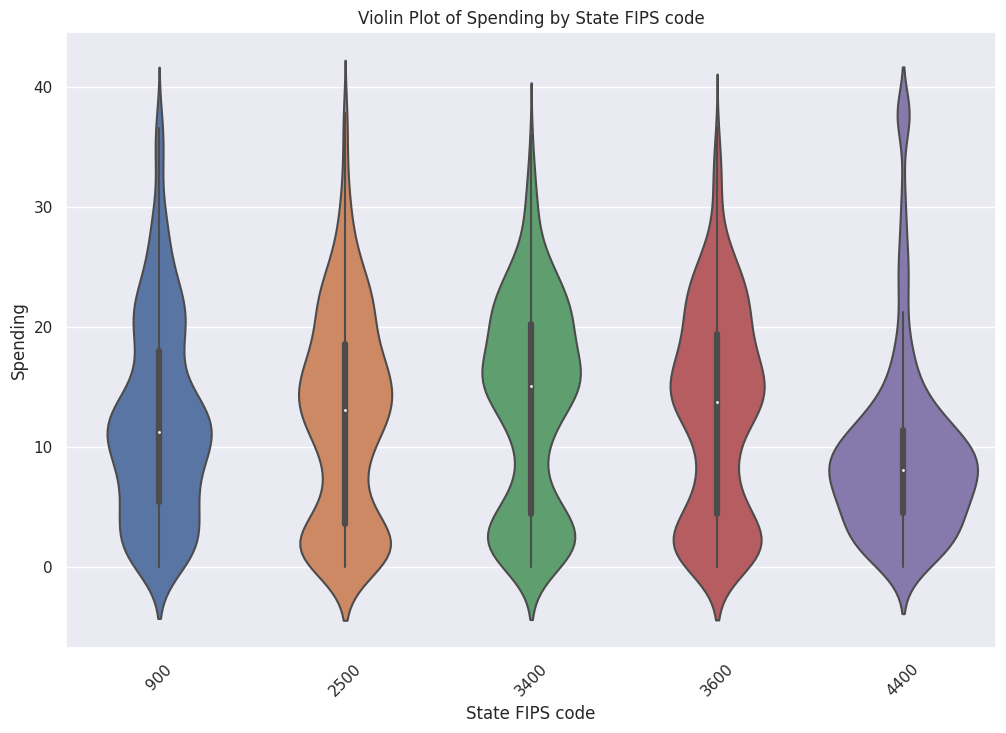

In [ ]:
sns.violinplot(x='State FIPS code', y='All merchant category codes spending', data=df)
plt.xlabel('State FIPS code')
plt.ylabel('Spending')
plt.title('Violin Plot of Spending by State FIPS code')
plt.xticks(rotation=45)
plt.show()

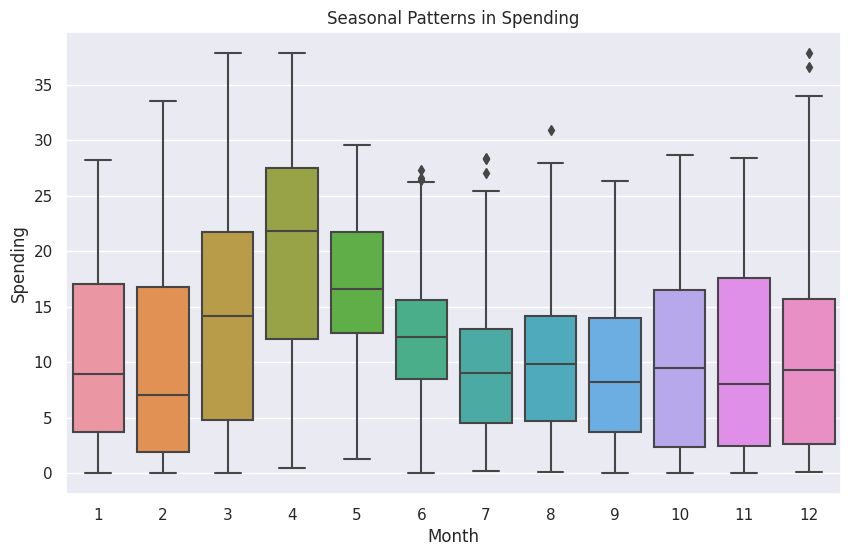

In [ ]:
import seaborn as sns

# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Plot boxplot of spending by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='All merchant category codes spending')
plt.xlabel('Month')
plt.ylabel('Spending')
plt.title('Seasonal Patterns in Spending')
plt.show()